In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from PIL import Image 
import numpy.polynomial.polynomial as poly

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/FirstBa/Batest

/Users/austinmcdonald/Desktop/FirstBa/Batest


In [3]:
files = os.listdir()
files = files[1:]
#files = files[1:90]

In [5]:
# 2 = 390->405
# 1 = 410->425
# 0 = 430->445
Xindex = 173 
Yindex = 83
Shape = 201
Row = int(4) # define the area to take around the spots
Col = int(4) # define the area to take around the spots
xvs = np.arange(0,Shape)
DataS=np.zeros(Shape**2).reshape((Shape,Shape))
IMG = dict()
ct = 0
p=0
eCoeff = 0.01160
eOffset= 1917

DataSub=np.zeros(Shape**2).reshape((Shape,Shape))
eCoeffM = eCoeff*np.ones(Shape**2).reshape((Shape,Shape))
eOffsetM = eOffset*np.ones(Shape**2).reshape((Shape,Shape))
for q in range(0,len(files)):
    Images = np.array(Image.open(files[q]))
    Images = eCoeffM*(Images - eOffsetM)
    ImageB = []
    for x in range(0,Shape):
        coefs = poly.polyfit(xvs, Images[x], 11) # fits 11th order poly 
        ffit  = poly.polyval(xvs, coefs)
        hold  = Images[x]-(ffit)
        hold[hold < 0] = 0        # replaces negtive values form the sub with 0
        ImageB.append(hold)
    DataSub += ImageB 
    ct += 1
    if ct > 2:  # this parts avgs 2 images
        p+=1
        ct = 0
        IMG[p] = (np.array(DataSub)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])/2
        DataSub = np.zeros(Shape**2).reshape((Shape,Shape))
        #im = Image.fromarray(IMG[p].astype('float64'))
        #im.save('/Users/austinmcdonald/Desktop/FirstBa/BaHist-v2/'+str(q)+'.tif')
    


    

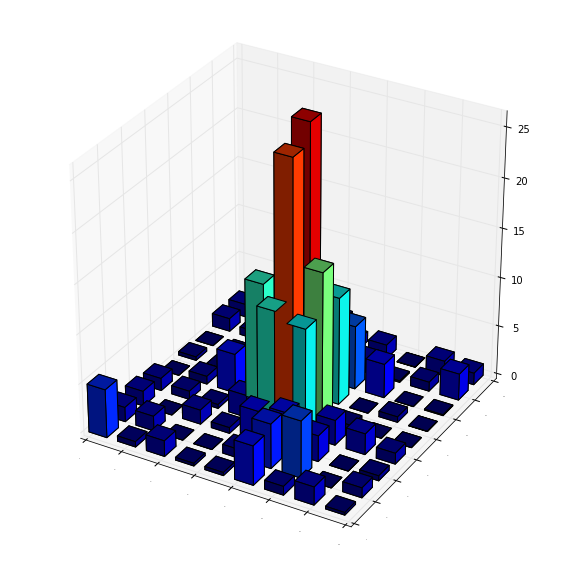

In [6]:
from mpl_toolkits.mplot3d import Axes3D

data = IMG[8] ## 8 qnd 15 look good

##########
ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()*160  
ypos = ypos.flatten()*160
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(30))

ax.bar3d(xpos,ypos,zpos, 100,100,data.flatten(), color=colors)

#ax.text(1200, 1600, 2300, "T = 0s", color='red', fontsize=50)

ax.set_zlim(0, 26)
#ax.set_xlabel(r'Image plane / nm', fontsize=38)
#ax.set_ylabel(r'160x160 nm', fontsize=38)
#ax.view_init(azim=44)
#ax.set_zlabel('Intensity / P.E.', fontsize=38)
plt.xticks(fontsize = 0)
plt.yticks(fontsize = 0)

#plt.gca().invert_yaxis()
#ax.view_init(azim=44)

plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/Ba-Ptbleach.png')
plt.show()

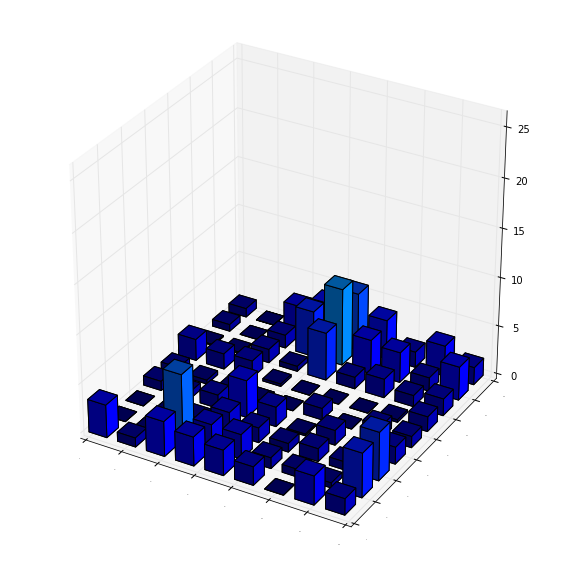

In [106]:
from mpl_toolkits.mplot3d import Axes3D

#data = ImageIM-2200
#data = ImageFM-2200
data = IMG[15]

###########

##########
ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()*160  
ypos = ypos.flatten()*160
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(30))
#colors = plt.cm.jet(data.flatten()/float(dd))

ax.bar3d(xpos,ypos,zpos, 100,100,data.flatten(), color=colors)

#ax.text(1200, 1600, 2300, "T = 0s", color='red', fontsize=50)

ax.set_zlim(0, 26)
#ax.set_xlabel(r'Image plane / nm', fontsize=38)
#ax.set_ylabel(r'160x160 nm', fontsize=38)
#ax.view_init(azim=44)
#ax.set_zlabel('Intensity / P.E.', fontsize=38)
plt.xticks(fontsize = 0)
plt.yticks(fontsize = 0)

#plt.gca().invert_yaxis()

plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/Ba-Postbleach.png')
plt.show()